In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_21.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_12.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_25.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_37.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_35.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_14.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_8.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_16.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_0.jpg
/kaggle/inpu

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
# from keras.utils import load_img, img_to_array

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=30,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    "../input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/training/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "../input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

Found 3566 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


In [4]:
model = Sequential([
      tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(64, 64, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(8, activation='softmax')
])
    
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

2023-02-04 06:56:43.290553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 06:56:43.291519: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 06:56:43.413003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 06:56:43.413844: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 06:56:43.414590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

ysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 06:56:43.417223: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 06:56:43.667760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 06:56:43.668625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 06:56:43.669397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

In [5]:
epochs = 5

history = model.fit(x = train_generator,validation_data=test_generator ,batch_size=32,verbose=1, epochs=epochs)

2023-02-04 06:57:03.206893: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2023-02-04 06:57:08.445050: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


112/112 [==============================] - 317s 3s/step - loss: 1.9482 - accuracy: 0.2199 - val_loss: 1.7155 - val_accuracy: 0.3101
Epoch 2/5
112/112 [==============================] - 248s 2s/step - loss: 1.5574 - accuracy: 0.4201 - val_loss: 1.3312 - val_accuracy: 0.4725
Epoch 3/5
112/112 [==============================] - 249s 2s/step - loss: 1.3264 - accuracy: 0.5140 - val_loss: 1.2017 - val_accuracy: 0.5304
Epoch 4/5
112/112 [==============================] - 246s 2s/step - loss: 1.2187 - accuracy: 0.5550 - val_loss: 1.2001 - val_accuracy: 0.5217
Epoch 5/5
112/112 [==============================] - 244s 2s/step - loss: 1.0736 - accuracy: 0.6094 - val_loss: 1.0641 - val_accuracy: 0.6116


In [6]:
model.evaluate(test_generator)

11/11 [==============================] - 21s 2s/step - loss: 1.0641 - accuracy: 0.6116


[1.0641436576843262, 0.6115942001342773]

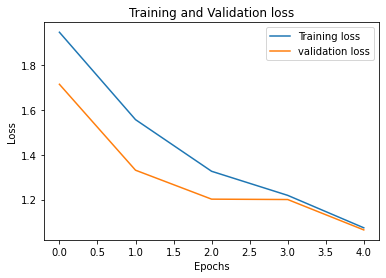

In [7]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
ep = range(epochs)
plt.plot(ep, loss_train, label='Training loss')
plt.plot(ep, loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

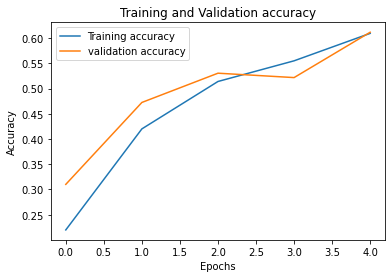

In [8]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ep = range(epochs)
plt.plot(ep, loss_train,label='Training accuracy')
plt.plot(ep, loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()